In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.metric.metric import MetricCalculator
from mesostat.utils.qt_helper import gui_fname, gui_fnames, gui_fpath
from mesostat.utils.hdf5_io import DataStorage

from lib.gallerosalas.data_fc_db_raw import DataFCDatabase
import lib.analysis.pid as pid

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [3]:
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data'] = '/media/alyosha/Data/TE_data/yasirdata_raw/'

In [4]:
dataDB = DataFCDatabase(params)

Reading channel label file
Reading allen brain map
Reading task structure
Searching for data files
Found mice ['mou_5', 'mou_6', 'mou_7', 'mou_9']


In [5]:
dataDB.calc_shortest_distances()

In [6]:
print('mice', dataDB.mice)
print('nSessions', len(dataDB.sessions))
print('datatypes', dataDB.get_data_types())
print('nChannel', dataDB.get_nchannels('mou_5'))

mice {'mou_5', 'mou_9', 'mou_6', 'mou_7'}
nSessions 4
datatypes ['raw', 'bn_session', 'bn_trial']
nChannel 27


In [7]:
h5outname = 'gallerosalas_result_higher_order_df.h5'

In [8]:
mc = MetricCalculator(serial=False, verbose=False, nCore=4)

# TODO
    
Hypothesis - Chain inhibition should increase synergy
* Cpu -> iGP/GP/eGP -> VM/VL

Performance-depencence
* Session-wise changes of redundancy/synergy as function of performance
* Movement-correlations of synergy/redundancy
    - Lick
    - Integral movement

# Hypotheses

# All-Distribution

**TODO**:
* [] Drop shitty sessions
* [] Try composite p-values
* [] For Info3D, drop PCA1
* [] Consider re-doing analysis with PCA1 dropped
* Fraction Significant triplets per session
    * [+] Do regression on PID instead of Naive vs Expert
    * [ ] Binomial test fraction significant PID's above chance
    * [ ] Test if regression explained by having more iGO trials in expert
* Most significant triplets
    * [ ] Fraction Significant Sessions bymouse
        - For each triplet, find fraction of sessions it is significant in
        - Sorted 1D plot
        - Drop non-significant
        - Extract labels for top 10
    * [ ] Fraction Significant Sessions concat
        - Same as above, but for all mice
        - Sort by all mice
        - Concat barplot/1Dplot, mice with different colors
    * [ ] Plot pvalue vs performance for top10 sessions

In [9]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
pwdAllH5 = '/media/alyosha/Data/TE_data/yasirdata_raw/rez/gallerosalas_result_multiregional_pid_df.h5'
# pwdAllH5 = gui_fname('h5path', './', '(*.h5)')

In [27]:
pid.plot_all_results_distribution(dataDB, pwdAllH5, plotstyle='cdf', minTrials=50, trialType='Hit')

mou_5_2017_03_06_session01_bn_session_DEL
mou_5_2017_03_06_session01_bn_session_REW
mou_5_2017_03_06_session01_bn_session_TEX
Skipping session 2017_03_06_session02 because it has too few trials 43
Skipping session 2017_03_06_session02 because it has too few trials 43
Skipping session 2017_03_06_session02 because it has too few trials 43
mou_5_2017_03_13_session01_bn_session_DEL
mou_5_2017_03_13_session01_bn_session_REW
mou_5_2017_03_13_session01_bn_session_TEX
mou_5_2017_03_13_session02_bn_session_DEL
mou_5_2017_03_13_session02_bn_session_REW
mou_5_2017_03_13_session02_bn_session_TEX
mou_5_2017_03_14_session02_bn_session_DEL
mou_5_2017_03_14_session02_bn_session_REW
mou_5_2017_03_14_session02_bn_session_TEX
mou_5_2017_03_15_session01_bn_session_DEL
mou_5_2017_03_15_session01_bn_session_REW
mou_5_2017_03_15_session01_bn_session_TEX
mou_5_2017_03_16_session01_bn_session_DEL
mou_5_2017_03_16_session01_bn_session_REW
mou_5_2017_03_16_session01_bn_session_TEX
Skipping session 2017_03_16_ses

mou_6_20171004_a_bn_session_TEX
Skipping session 20171005_a because it has too few trials 49
Skipping session 20171005_a because it has too few trials 49
Skipping session 20171005_a because it has too few trials 49
mou_6_20170925_a_bn_trial_DEL
mou_6_20170925_a_bn_trial_REW
mou_6_20170925_a_bn_trial_TEX
mou_6_20170925_b_bn_trial_DEL
mou_6_20170925_b_bn_trial_REW
mou_6_20170925_b_bn_trial_TEX
mou_6_20170925_c_bn_trial_DEL
mou_6_20170925_c_bn_trial_REW
mou_6_20170925_c_bn_trial_TEX
mou_6_20170926_a_bn_trial_DEL
mou_6_20170926_a_bn_trial_REW
mou_6_20170926_a_bn_trial_TEX
mou_6_20170926_b_bn_trial_DEL
mou_6_20170926_b_bn_trial_REW
mou_6_20170926_b_bn_trial_TEX
mou_6_20170926_c_bn_trial_DEL
mou_6_20170926_c_bn_trial_REW
mou_6_20170926_c_bn_trial_TEX
mou_6_20170927_a_bn_trial_DEL
mou_6_20170927_a_bn_trial_REW
mou_6_20170927_a_bn_trial_TEX
mou_6_20170927_b_bn_trial_DEL
mou_6_20170927_b_bn_trial_REW
mou_6_20170927_b_bn_trial_TEX
mou_6_20170927_c_bn_trial_DEL
mou_6_20170927_c_bn_trial_REW
mou_6

mou_7_20171122_d_bn_trial_REW
mou_7_20171122_d_bn_trial_TEX
Skipping session 20171123_a because it has too few trials 46
Skipping session 20171123_a because it has too few trials 46
Skipping session 20171123_a because it has too few trials 46
mou_7_20171123_b_bn_trial_DEL
mou_7_20171123_b_bn_trial_REW
mou_7_20171123_b_bn_trial_TEX
mou_7_20171127_a_bn_trial_DEL
mou_7_20171127_a_bn_trial_REW
mou_7_20171127_a_bn_trial_TEX
mou_7_20171127_b_bn_trial_DEL
mou_7_20171127_b_bn_trial_REW
mou_7_20171127_b_bn_trial_TEX
mou_7_20171127_c_bn_trial_DEL
mou_7_20171127_c_bn_trial_REW
mou_7_20171127_c_bn_trial_TEX
mou_7_20171128_a_bn_trial_DEL
mou_7_20171128_a_bn_trial_REW
mou_7_20171128_a_bn_trial_TEX
mou_7_20171128_b_bn_trial_DEL
mou_7_20171128_b_bn_trial_REW
mou_7_20171128_b_bn_trial_TEX
mou_7_20171129_a_bn_trial_DEL
mou_7_20171129_a_bn_trial_REW
mou_7_20171129_a_bn_trial_TEX
mou_7_20171129_b_bn_trial_DEL
mou_7_20171129_b_bn_trial_REW
mou_7_20171129_b_bn_trial_TEX
Skipping session 20171129_d because i

In [31]:
pid.plot_all_frac_significant_bysession(dataDB, pwdAllH5, minTrials=40, trialType='Hit')

mou_5_bn_session_DEL
Skipping session 2017_03_22_session01 because it has too few trials 21
Skipping session 2017_03_22_session04 because it has too few trials 33
Skipping session 2017_03_24_session03 because it has too few trials 34
mou_5_bn_session_REW
Skipping session 2017_03_22_session01 because it has too few trials 21
Skipping session 2017_03_22_session04 because it has too few trials 33
Skipping session 2017_03_24_session03 because it has too few trials 34
mou_5_bn_session_TEX
Skipping session 2017_03_22_session01 because it has too few trials 21
Skipping session 2017_03_22_session04 because it has too few trials 33
Skipping session 2017_03_24_session03 because it has too few trials 34
mou_5_bn_trial_DEL
Skipping session 2017_03_22_session01 because it has too few trials 21
Skipping session 2017_03_22_session04 because it has too few trials 33
Skipping session 2017_03_24_session03 because it has too few trials 34
mou_5_bn_trial_REW
Skipping session 2017_03_22_session01 because i

TODO:
* Top 10 most synergetic connections
    - Try magnitude vs avg p-value vs fraction significant
    - Plot colorbars to show fraction of sessions by mouse
* Top 10 most synergy-involved regions
    - Count fraction of significant triplets where this region is target

In [11]:
pid.plot_all_top_n_frac_significant(dataDB, pwdAllH5, nTop=20, minTrials=50,
                                    haveTriplet=True, haveSinglet=False, trgPlotList=['VPL'])

bn_session_REW mvg_4
bn_session_REW mvg_7
Skipping session mvg_7_2018_11_09_a because it has too few trials 3
Skipping session mvg_7_2018_11_12_a because it has too few trials 13
Skipping session mvg_7_2018_11_13_a because it has too few trials 13
bn_session_REW mvg_8
Skipping session mvg_8_2018_11_12_a because it has too few trials 44
Skipping session mvg_8_2018_11_13_a because it has too few trials 41
Skipping session mvg_8_2018_11_18_a because it has too few trials 38
bn_session_REW mvg_9
Skipping session mvg_9_2019_02_06_a because it has too few trials 39
Skipping session mvg_9_2019_02_08_a because it has too few trials 15
Skipping session mvg_9_2019_02_12_a because it has too few trials 16
0.4175019425019425
bn_session_TEX mvg_4
bn_session_TEX mvg_7
Skipping session mvg_7_2018_11_09_a because it has too few trials 3
Skipping session mvg_7_2018_11_12_a because it has too few trials 13
Skipping session mvg_7_2018_11_13_a because it has too few trials 13
bn_session_TEX mvg_8
Skipping

In [16]:
intervDict = {
    "TEX" : [2.0, 4.0],
    "DEL" : [5.0, 6.8],
    "REW" : [7.0, 8.0]
}


hDict = {
#     "H_ALL_REW"  : ("REW", ['NO', 'PM'], ['FL'])
    "H_ALL_REW"  : ("REW", ['PL', 'PM'], ['LI'])
}

pid.hypotheses_calc_plot_info3D(dataDB, hDict, intervDict,
                                datatypes=['bn_session', 'bn_trial'], trialType='Hit')

H_ALL_REW
H_ALL_REW


## All - Distribution - Nosession

In [10]:
import lib.analysis.pid_joint as pid_joint

In [11]:
pwdAllH5_2 = '/media/alyosha/Data/TE_data/yasirdata_raw/rez/gallerosalas_result_multiregional_pid_all_df.h5'

In [12]:
dfSummary = pid_joint.pid_all_summary_df(pwdAllH5_2)

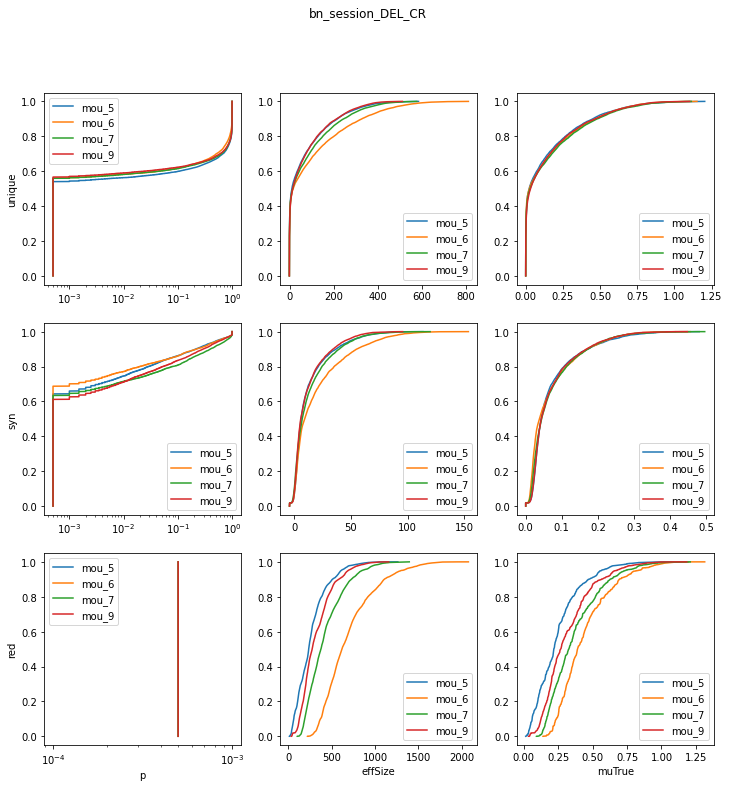

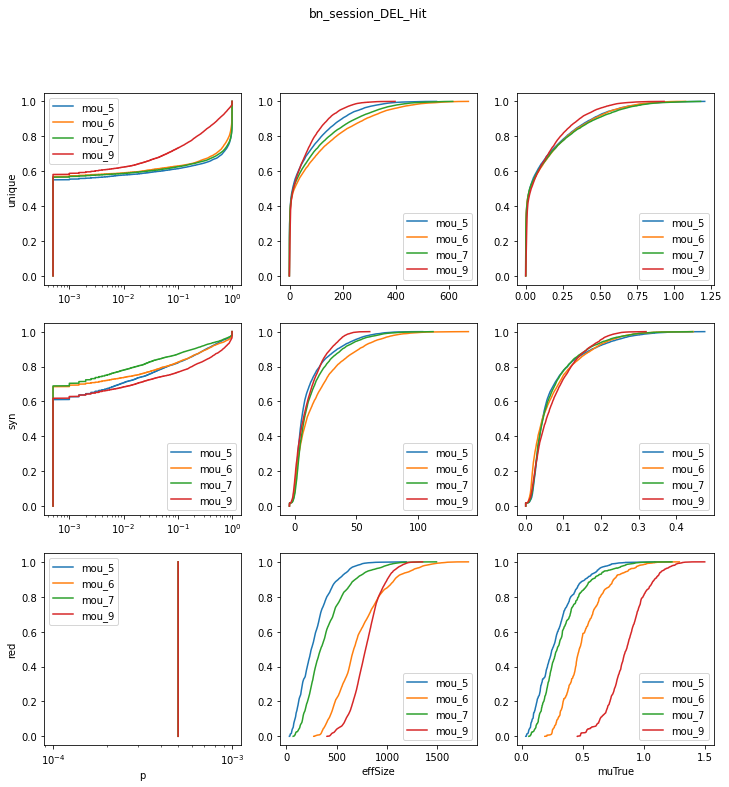

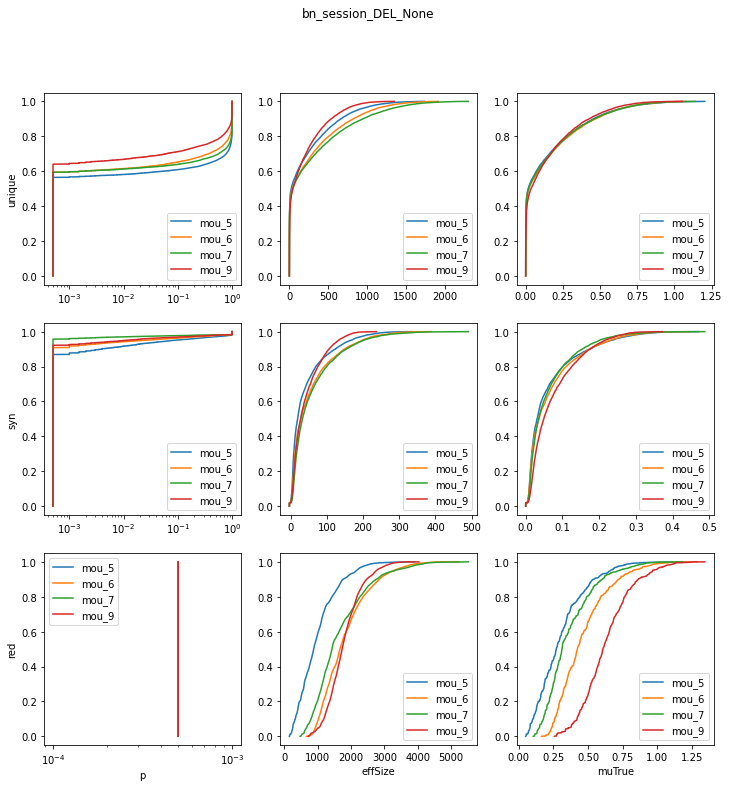

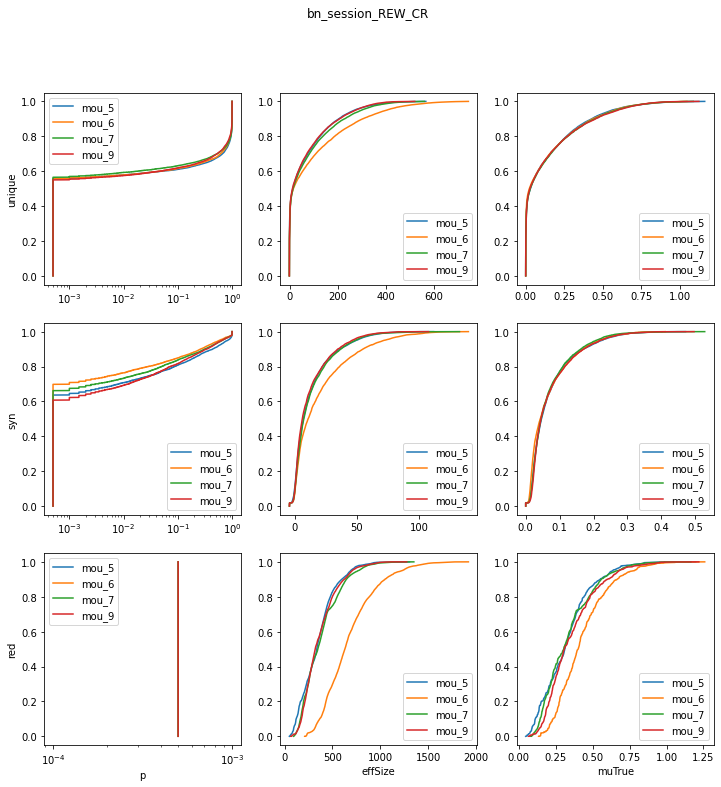

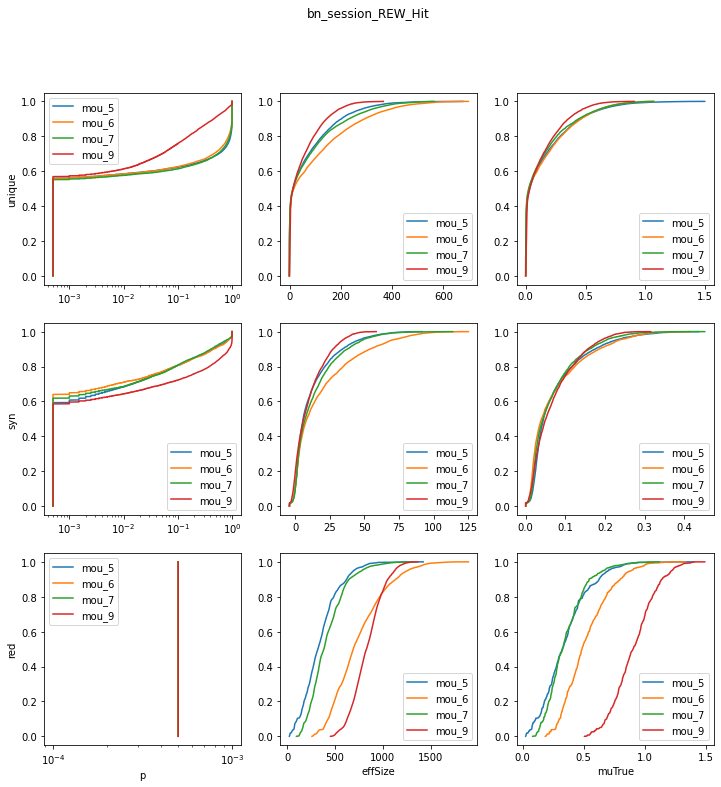

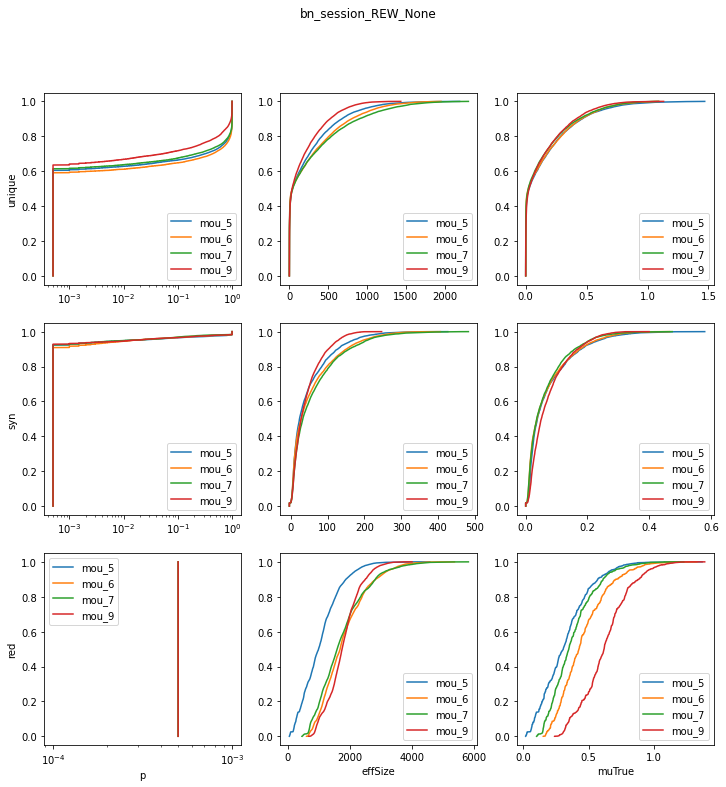

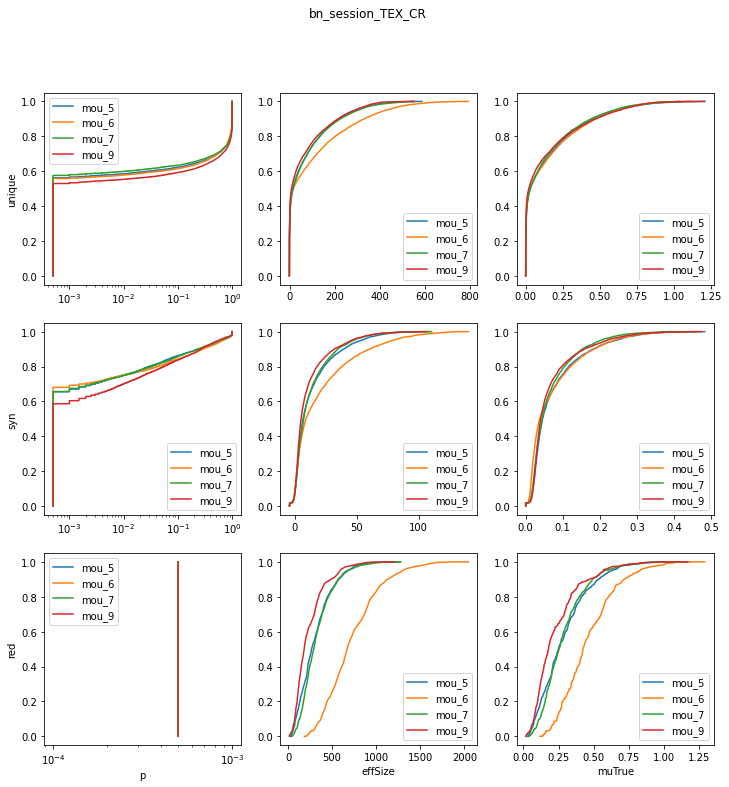

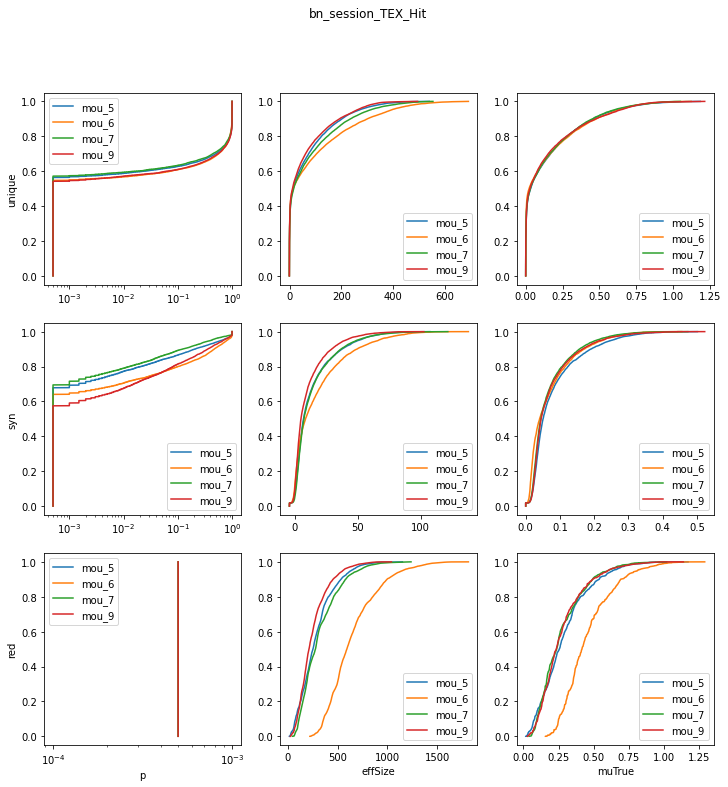

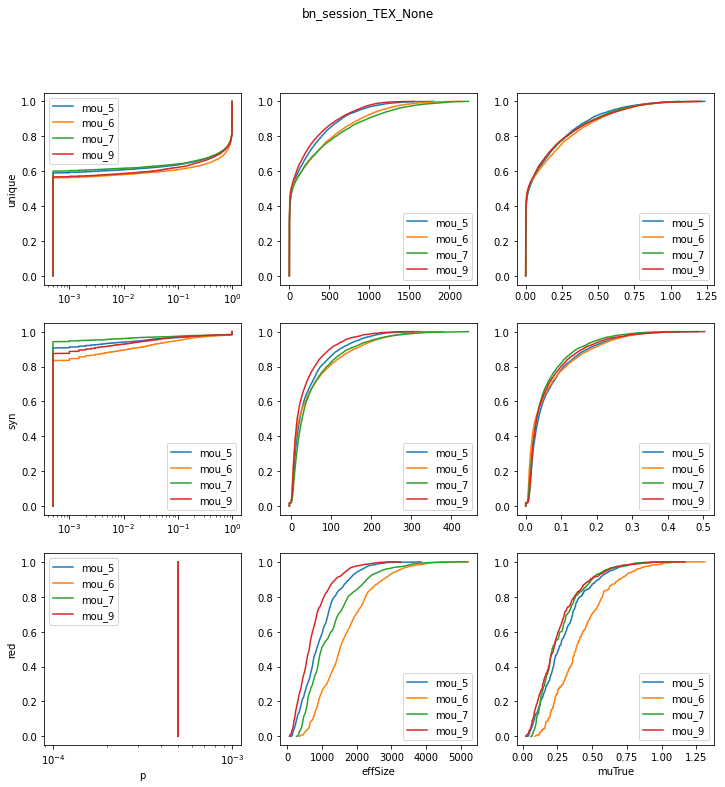

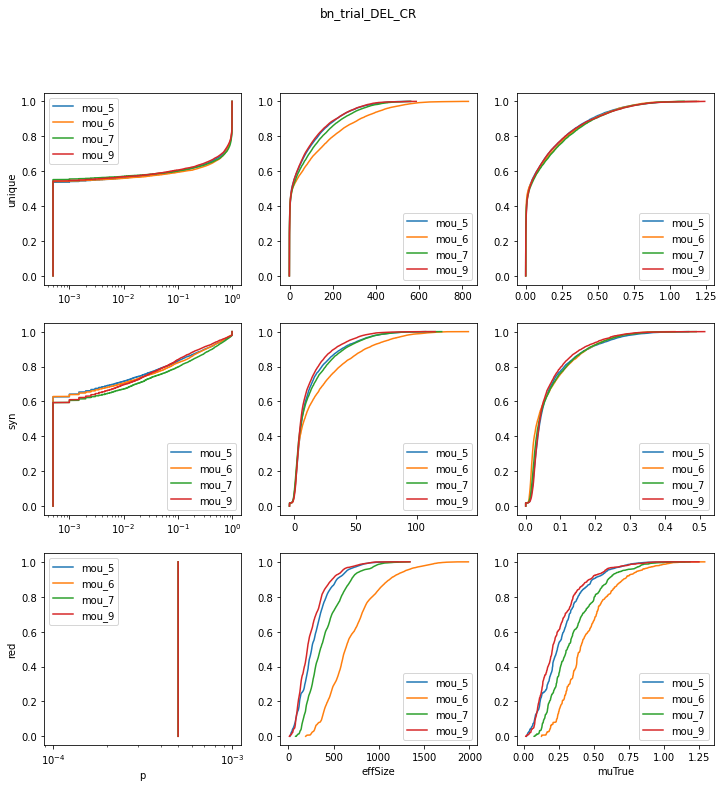

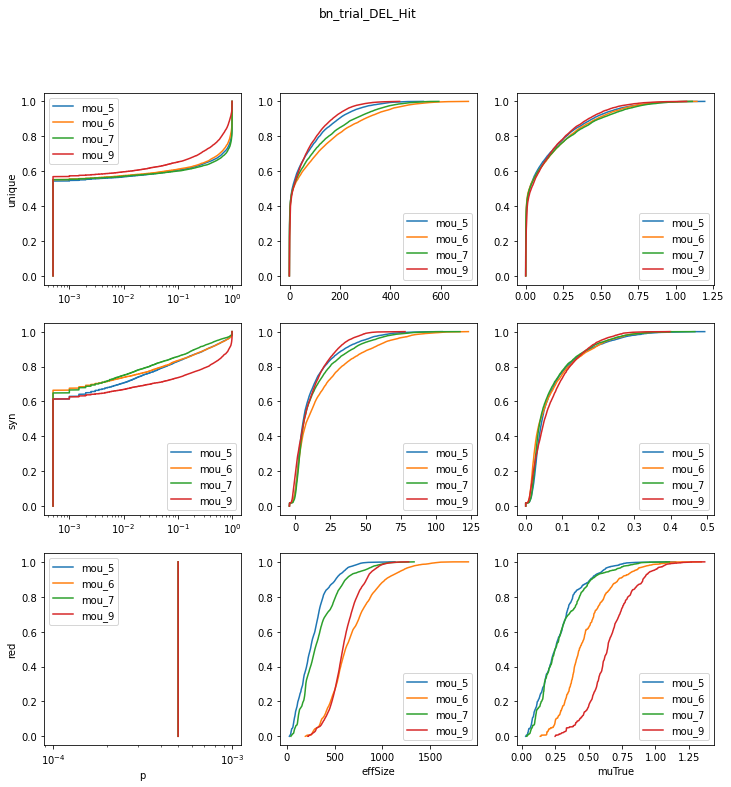

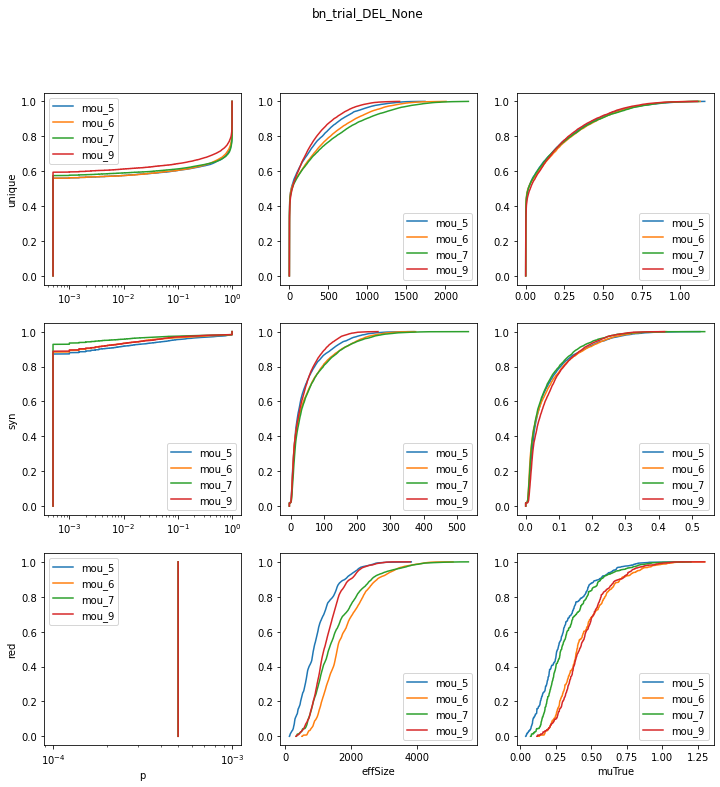

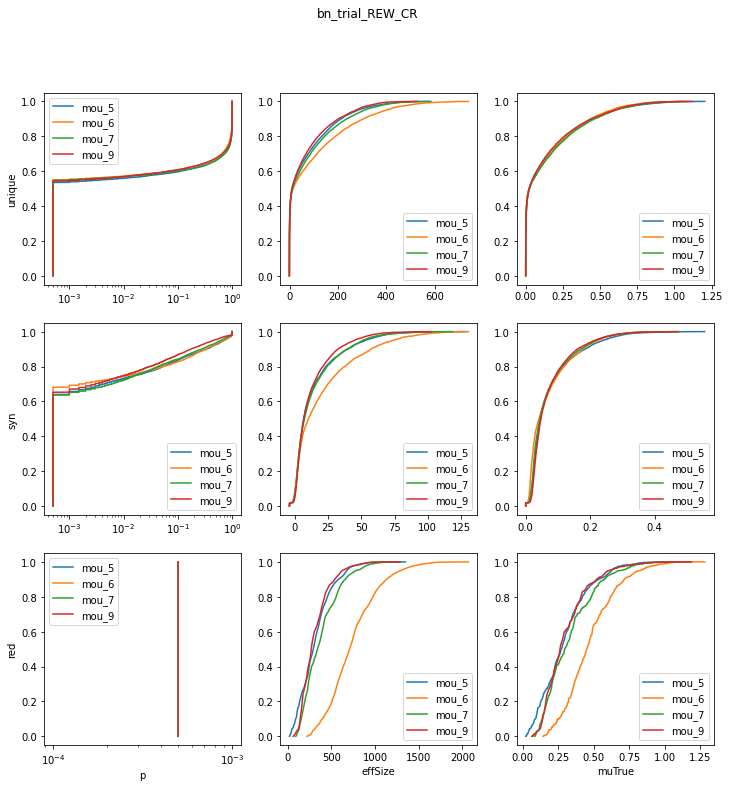

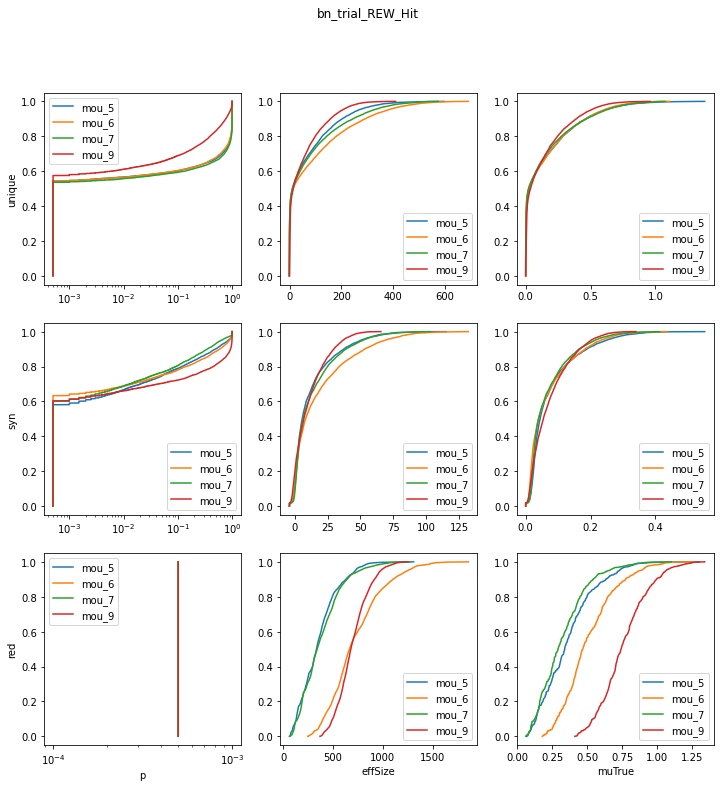

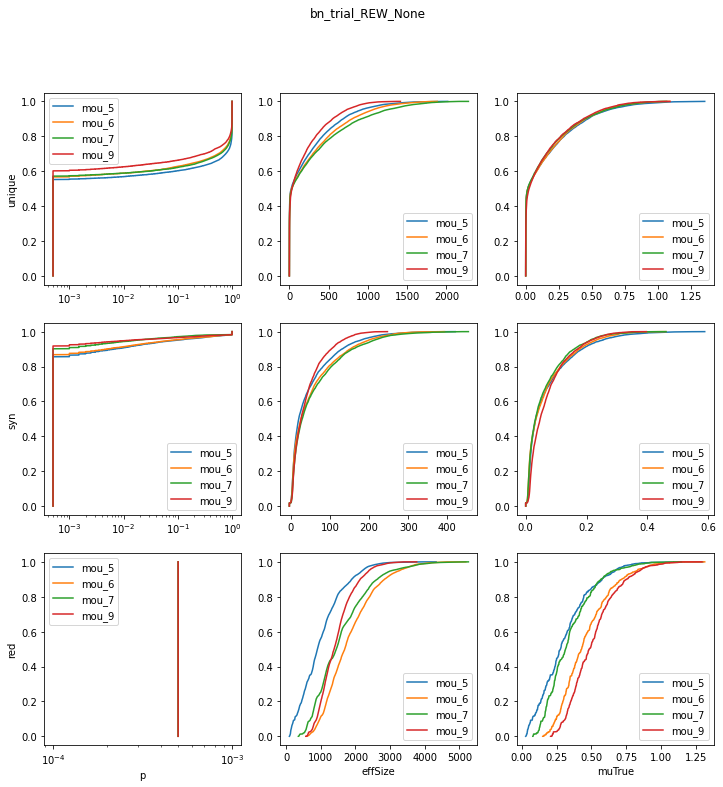

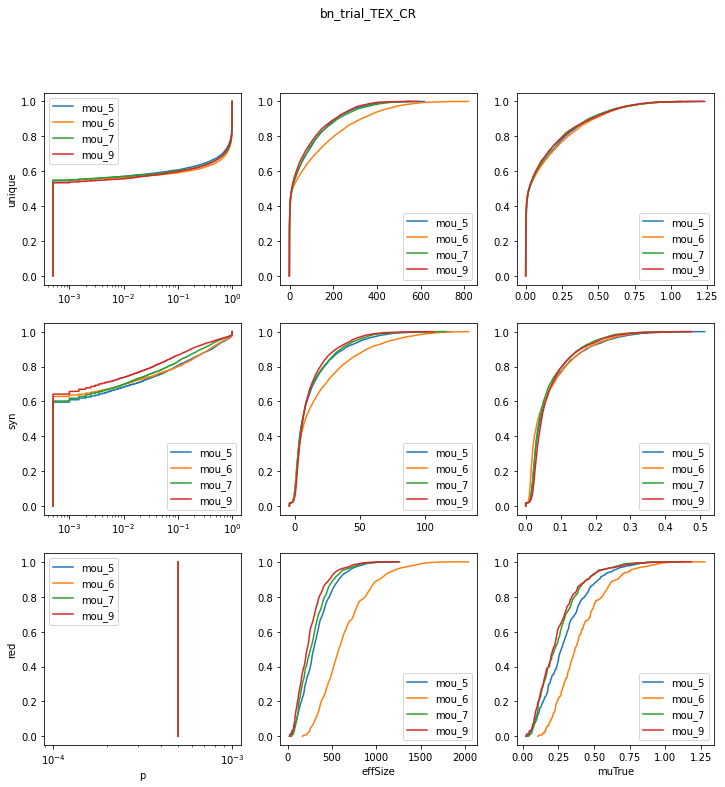

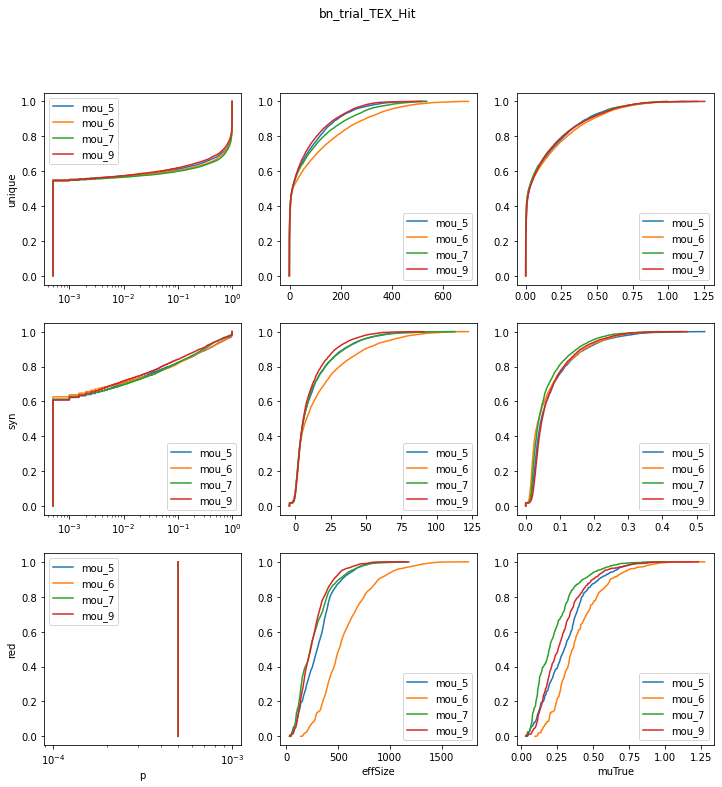

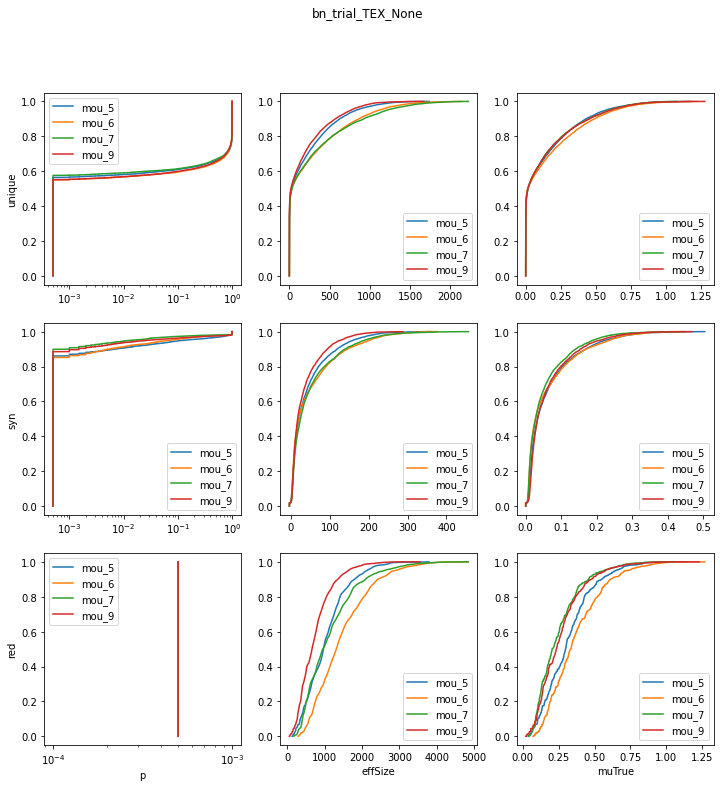

In [36]:
pid_joint.cdfplot(pwdAllH5_2, dfSummary)

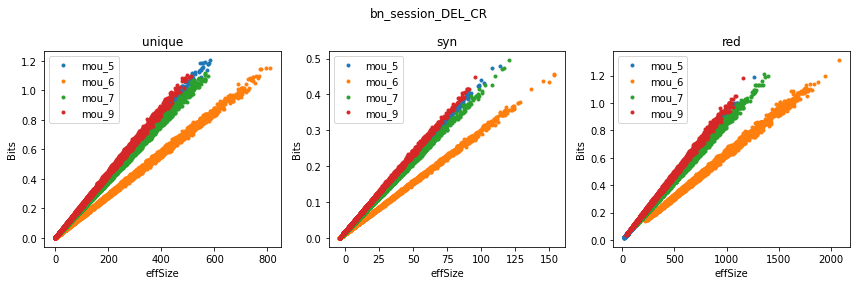

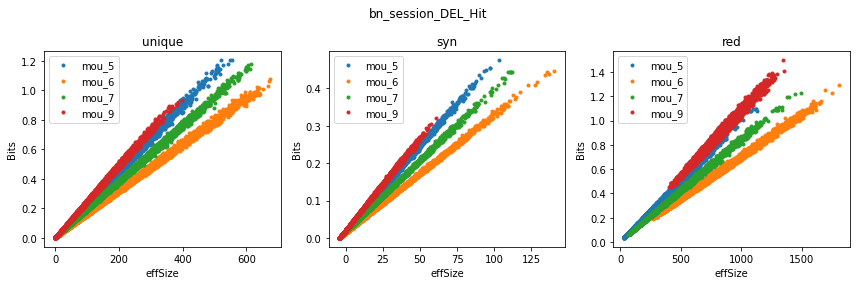

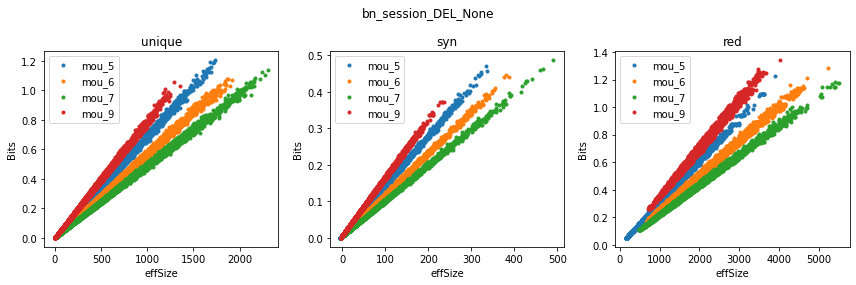

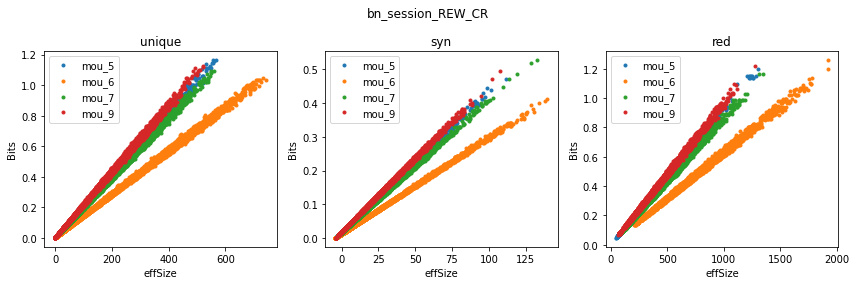

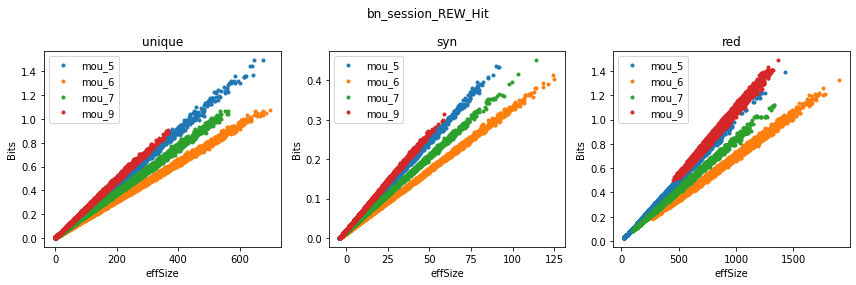

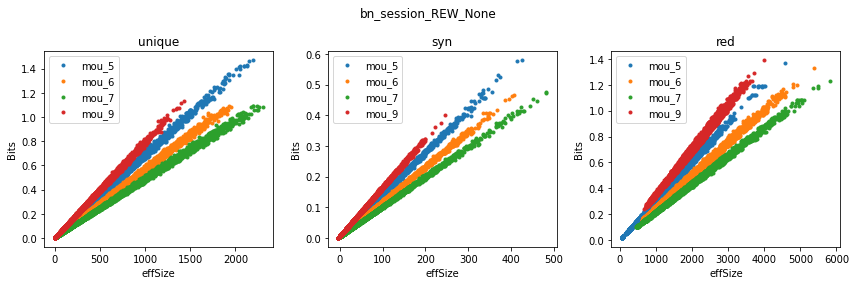

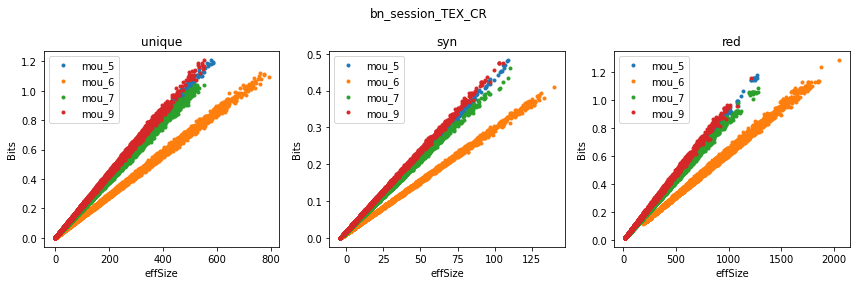

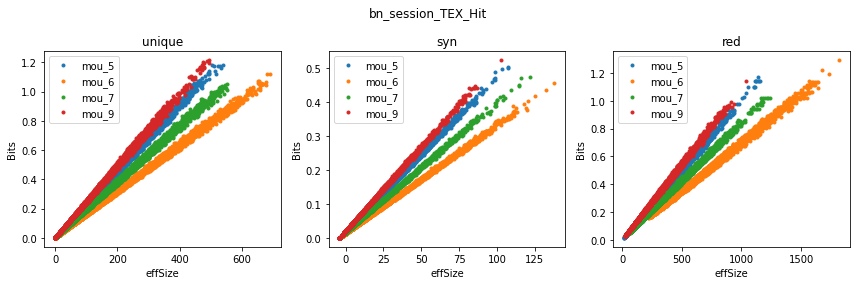

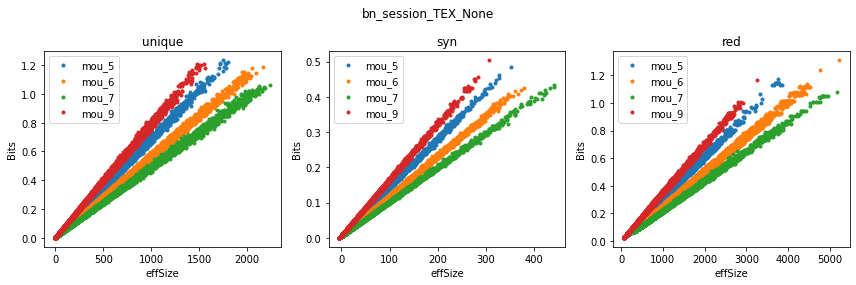

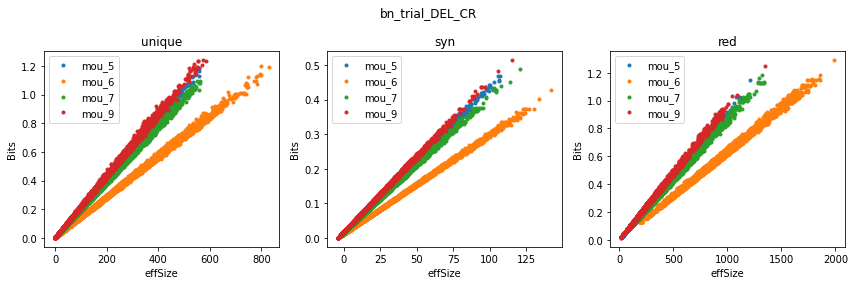

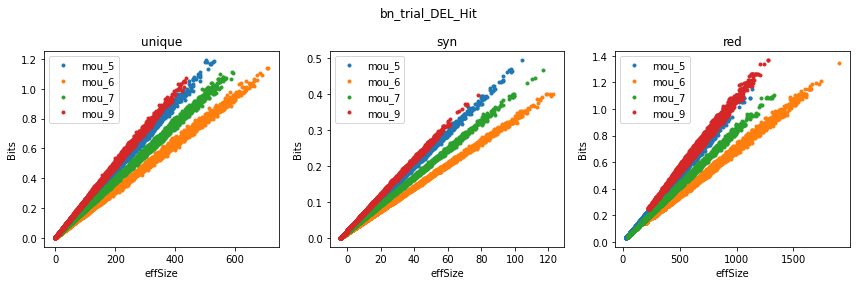

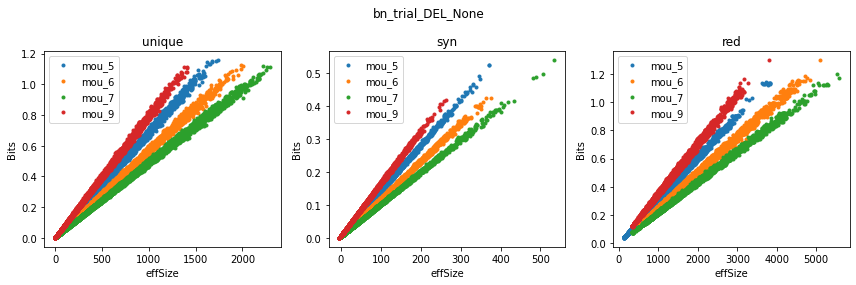

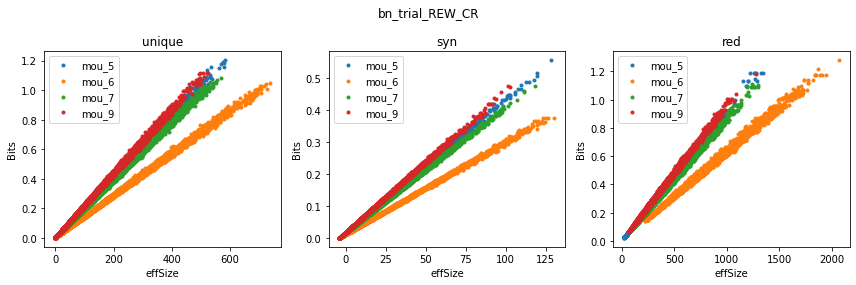

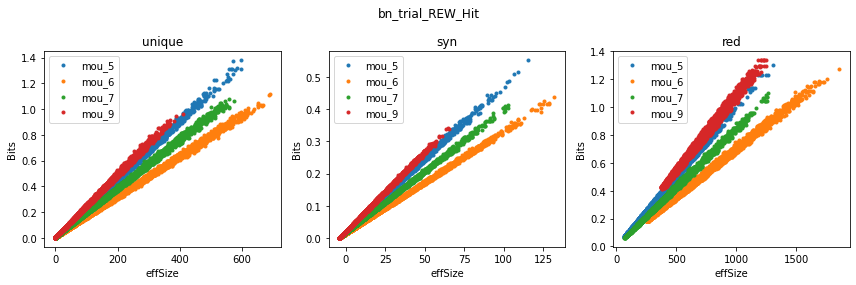

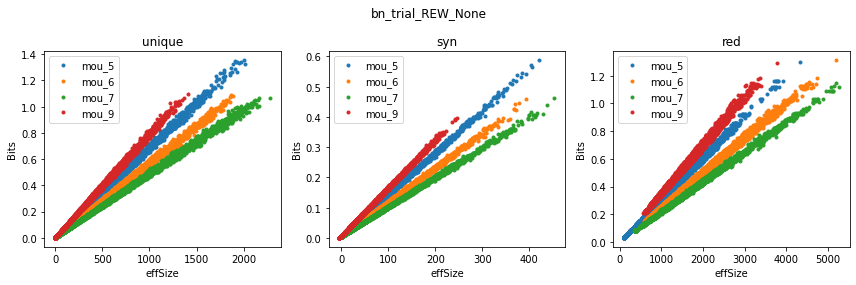

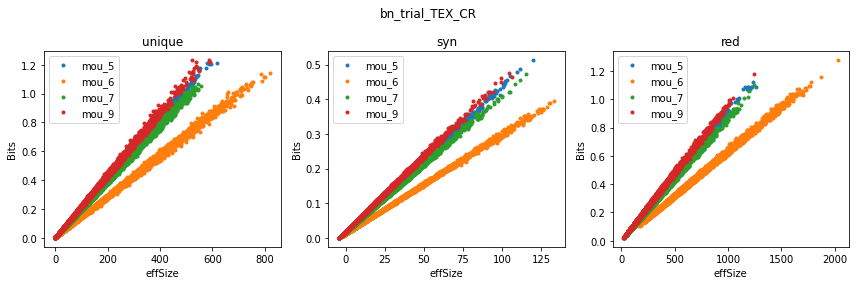

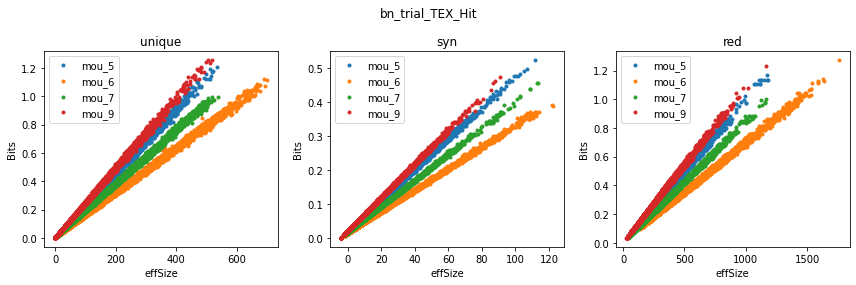

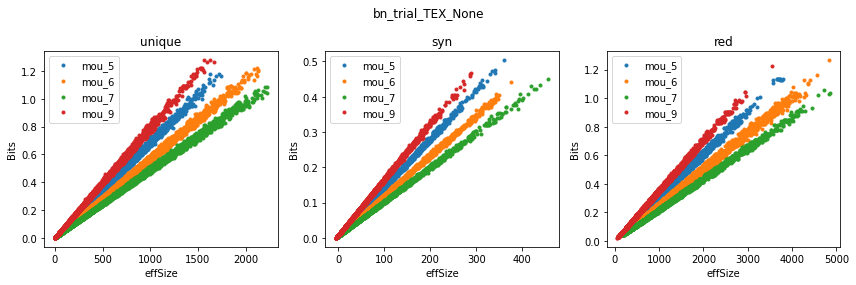

In [37]:
pid_joint.scatter_effsize_bits(pwdAllH5_2, dfSummary)

unique 10626 10626
syn 5313 5313
red 5313 5313


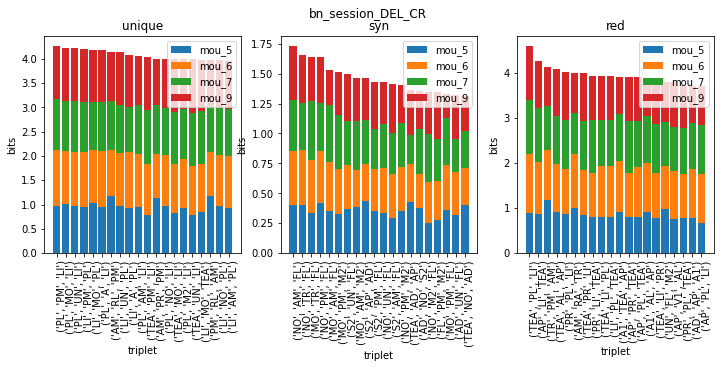

unique 10626 10626
syn 5313 5313
red 5313 5313


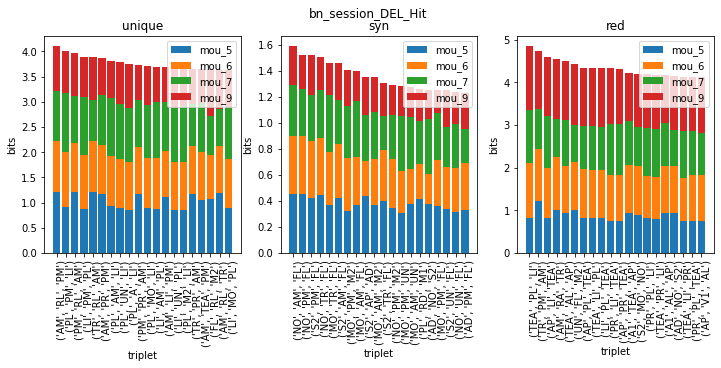

unique 10626 10626
syn 5313 5313
red 5313 5313


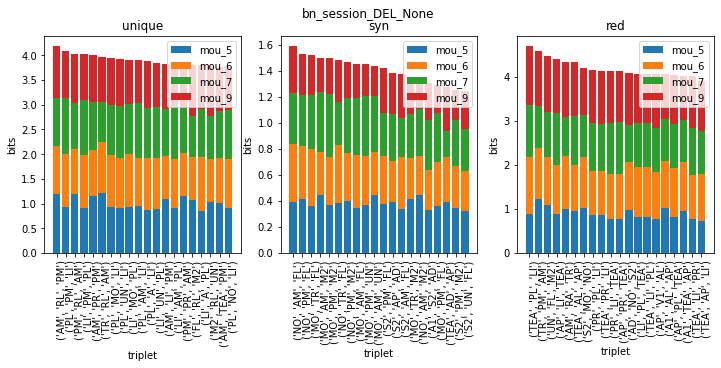

unique 10626 10626
syn 5313 5313
red 5313 5313


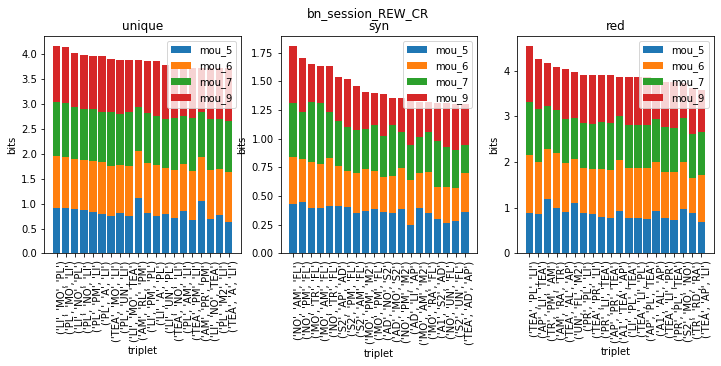

unique 10626 10626
syn 5313 5313
red 5313 5313


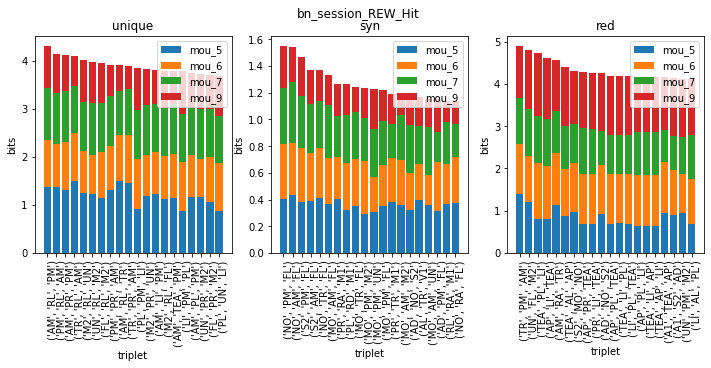

unique 10626 10626
syn 5313 5313
red 5313 5313


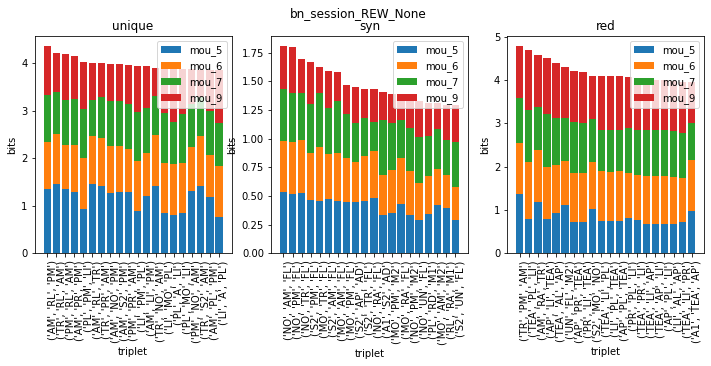

unique 10626 10626
syn 5313 5313
red 5313 5313


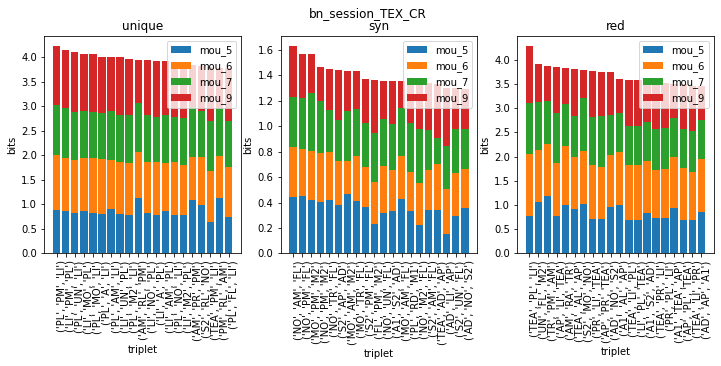

unique 10626 10626
syn 5313 5313
red 5313 5313


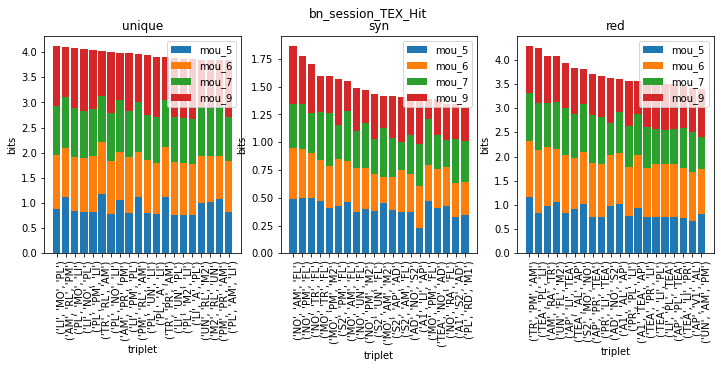

unique 10626 10626
syn 5313 5313
red 5313 5313


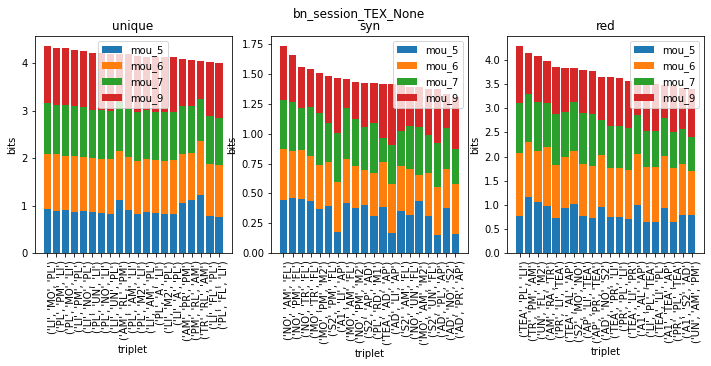

unique 10626 10626
syn 5313 5313
red 5313 5313


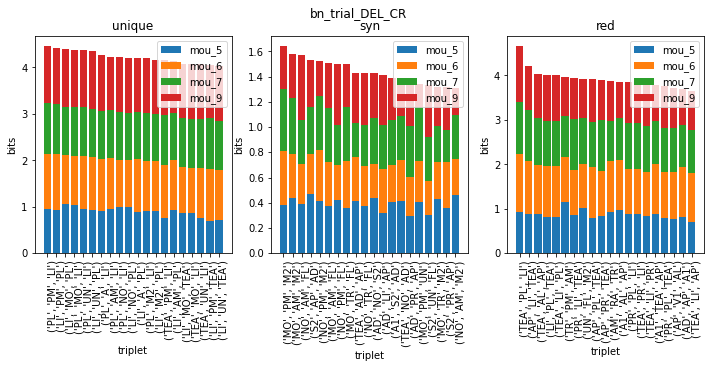

unique 10626 10626
syn 5313 5313
red 5313 5313


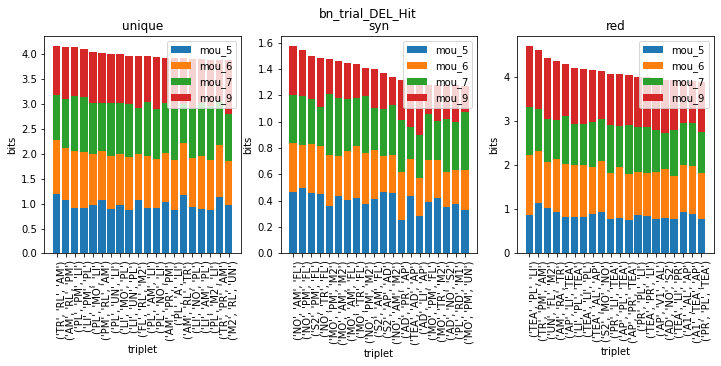

unique 10626 10626
syn 5313 5313
red 5313 5313


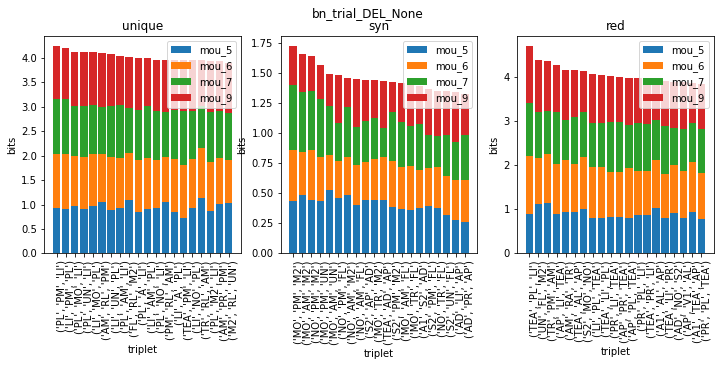

unique 10626 10626
syn 5313 5313
red 5313 5313


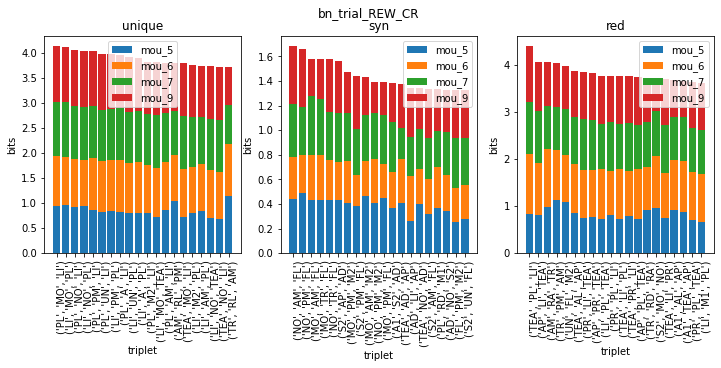

unique 10626 10626
syn 5313 5313
red 5313 5313


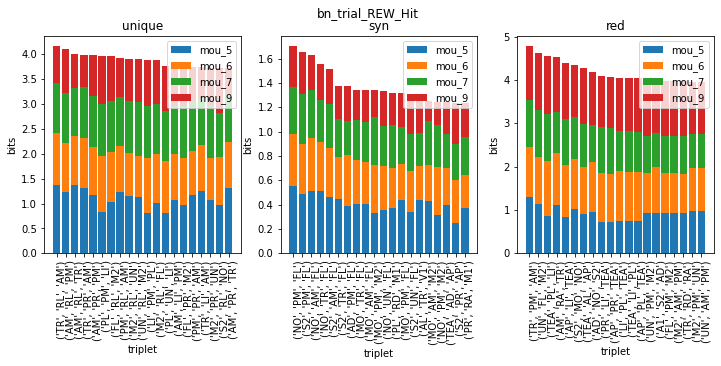

unique 10626 10626
syn 5313 5313
red 5313 5313


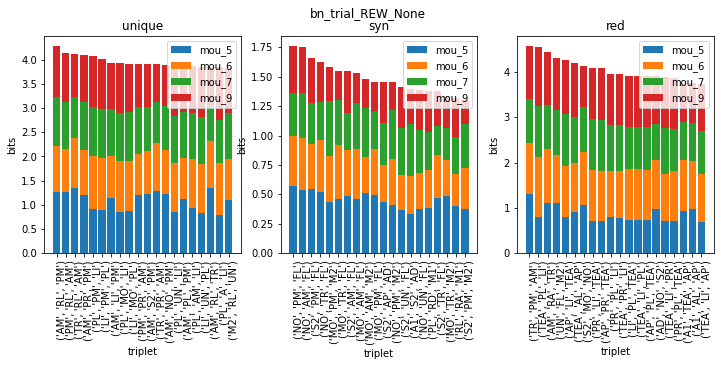

unique 10626 10626
syn 5313 5313
red 5313 5313


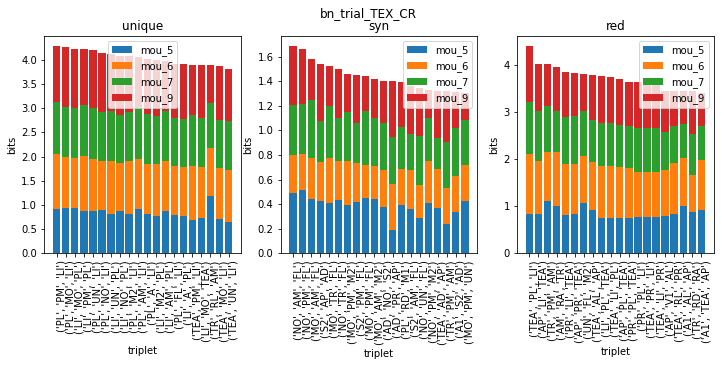

unique 10626 10626
syn 5313 5313
red 5313 5313


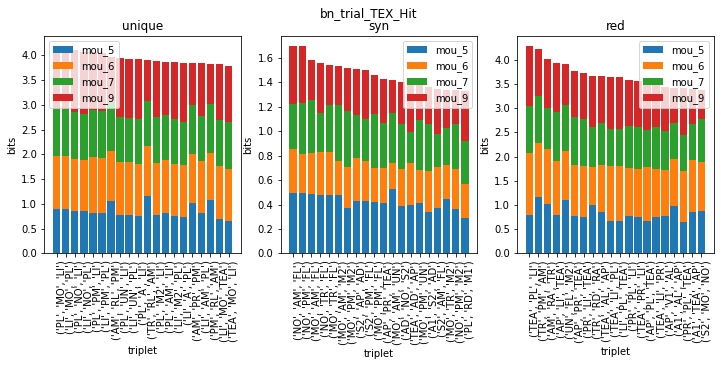

unique 10626 10626
syn 5313 5313
red 5313 5313


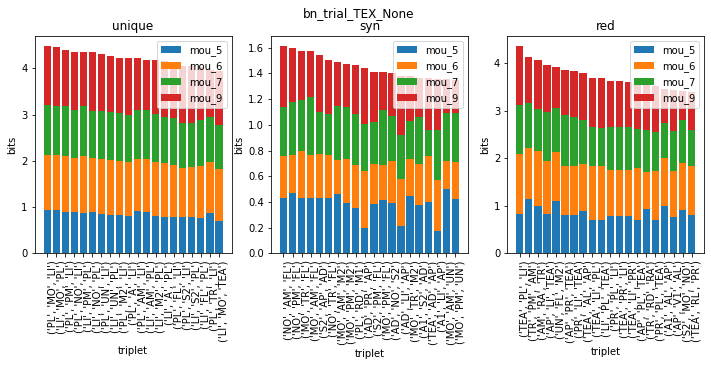

In [15]:
pid_joint.plot_triplets(pwdAllH5_2, dfSummary, nTop=20, dropChannels=['BC'])